In [5]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from rich import print
import warnings

warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [6]:
path = '../data/processed/whole_africa_genome.csv'
df = pd.read_csv(path)

In [7]:
df.head()

,#,Se ID,Patient Code,PAT id(SSAM),Accession,Name,Subtype,Country,Sampling Year,Georegion,HXB2/MAC239 start,HXB2/MAC239 stop,Sequence Length,Organism
0,1,114321,NJ97-42,24045.0,AB049811,97GH-AG1,02_AG,GHANA,1997.0,AFR SSA,1,9690,9748,HIV-1
1,2,208491,1116,3526.0,AB050905,99ZM1116,C,ZAMBIA,1999.0,AFR SSA,7023,7307,279,HIV-1
2,3,208490,12,3527.0,AB050906,99ZM12,C,ZAMBIA,1999.0,AFR SSA,7023,7308,279,HIV-1
3,4,208489,13,3528.0,AB050907,99ZM13,C,ZAMBIA,1999.0,AFR SSA,7023,7309,279,HIV-1
4,5,208488,18,3529.0,AB050908,99ZM18,C,ZAMBIA,1999.0,AFR SSA,7023,7307,279,HIV-1


In [8]:
df.describe()

,#,Se ID,PAT id(SSAM),Sampling Year,HXB2/MAC239 start,HXB2/MAC239 stop,Sequence Length
count,243264.000000,2.432640e+05,179052.000000,219462.000000,243264.000000,243264.000000,243264.000000
mean,121632.500000,5.767704e+05,62573.067958,2006.933050,3869.615825,5272.278418,1402.105046
std,70224.412279,3.458878e+05,42811.770794,6.551675,2484.321665,2715.743315,1499.444509
min,1.000000,2.810000e+02,5.000000,1959.000000,1.000000,9.000000,50.000000
25%,60816.750000,3.136718e+05,30647.000000,2003.000000,2243.000000,3263.000000,594.000000
50%,121632.500000,5.420805e+05,50395.500000,2007.000000,2550.000000,3749.000000,1004.000000
75%,182448.250000,8.324802e+05,95876.250000,2011.000000,6227.000000,7757.000000,1476.000000
max,243264.000000,1.285059e+06,172034.000000,2024.000000,9691.000000,10038.000000,10414.000000


In [9]:
print(df.columns)

Index(['#', 'Se ID', 'Patient Code', 'PAT id(SSAM)', 'Accession', 'Name',
       'Subtype', 'Country', 'Sampling Year', 'Georegion', 'HXB2/MAC239 start',
       'HXB2/MAC239 stop', 'Sequence Length', 'Organism'],
      dtype='object')

In [10]:
df_countries = df['Country'].value_counts()
df_countries.columns = ['Country', 'Genome_Count']

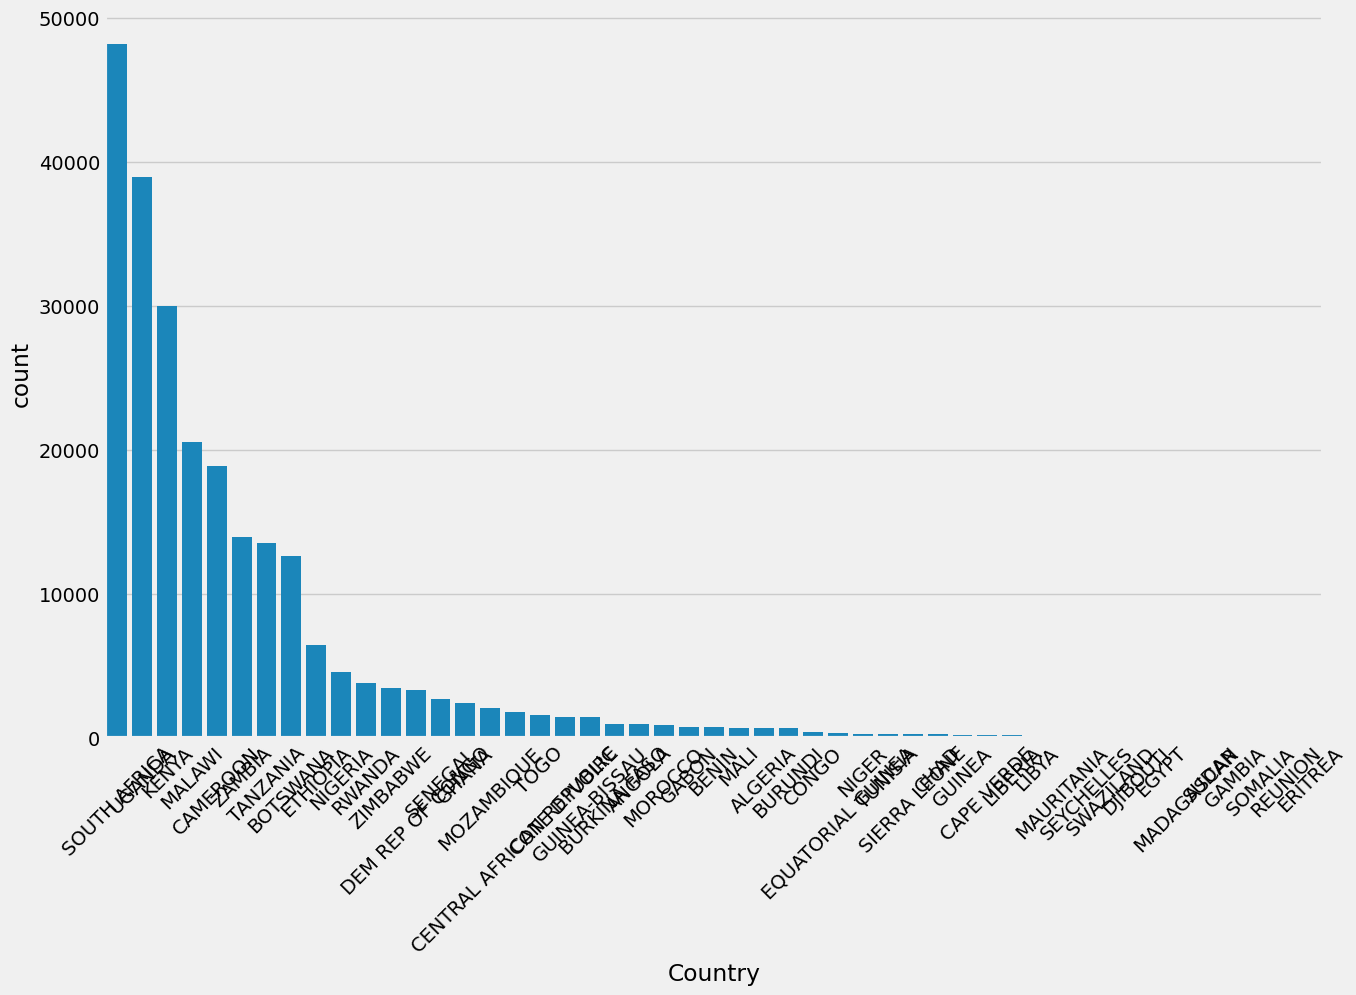

In [11]:
fig, ax = plt.subplots(figsize=(14, 9))  # Adjust figure size as needed
sns.barplot(data=df_countries, ax=ax)
plt.xticks(rotation=45)  # This will affect the Seaborn plot on the same axis
plt.show()

In [12]:
len(df['Country'].unique())

50

In [13]:
df['Sequence Length'].value_counts()

Sequence Length
999     5589
1302    5081
1035    4901
864     3650
390     2844
        ... 
3040       1
9255       1
9264       1
2790       1
5502       1
Name: count, Length: 4987, dtype: int64

In [14]:
df['Accession'].to_csv('accession_africa.txt', index=False, header=False)

In [15]:
df_year_included = df[df['Sampling Year'].notnull()]

In [16]:
df_year_included.head()

,#,Se ID,Patient Code,PAT id(SSAM),Accession,Name,Subtype,Country,Sampling Year,Georegion,HXB2/MAC239 start,HXB2/MAC239 stop,Sequence Length,Organism
0,1,114321,NJ97-42,24045.0,AB049811,97GH-AG1,02_AG,GHANA,1997.0,AFR SSA,1,9690,9748,HIV-1
1,2,208491,1116,3526.0,AB050905,99ZM1116,C,ZAMBIA,1999.0,AFR SSA,7023,7307,279,HIV-1
2,3,208490,12,3527.0,AB050906,99ZM12,C,ZAMBIA,1999.0,AFR SSA,7023,7308,279,HIV-1
3,4,208489,13,3528.0,AB050907,99ZM13,C,ZAMBIA,1999.0,AFR SSA,7023,7309,279,HIV-1
4,5,208488,18,3529.0,AB050908,99ZM18,C,ZAMBIA,1999.0,AFR SSA,7023,7307,279,HIV-1


In [17]:
df_year_included.describe()

,#,Se ID,PAT id(SSAM),Sampling Year,HXB2/MAC239 start,HXB2/MAC239 stop,Sequence Length
count,219462.000000,2.194620e+05,162373.000000,219462.000000,219462.000000,219462.000000,219462.000000
mean,124922.527162,5.955127e+05,64675.580133,2006.933050,3807.538248,5271.268124,1463.332914
std,68844.321087,3.410228e+05,42768.375412,6.551675,2451.684220,2725.635652,1550.173185
min,1.000000,2.810000e+02,5.000000,1959.000000,1.000000,9.000000,50.000000
25%,66920.250000,3.292032e+05,31079.000000,2003.000000,2243.000000,3263.000000,609.000000
50%,125713.500000,5.640355e+05,51977.000000,2007.000000,2510.000000,3737.000000,1019.000000
75%,183720.750000,8.350888e+05,97502.000000,2011.000000,6225.000000,7787.000000,1491.000000
max,243264.000000,1.285059e+06,172034.000000,2024.000000,9691.000000,10038.000000,10414.000000


In [18]:
sum(df_year_included['Sampling Year'].isnull())

0

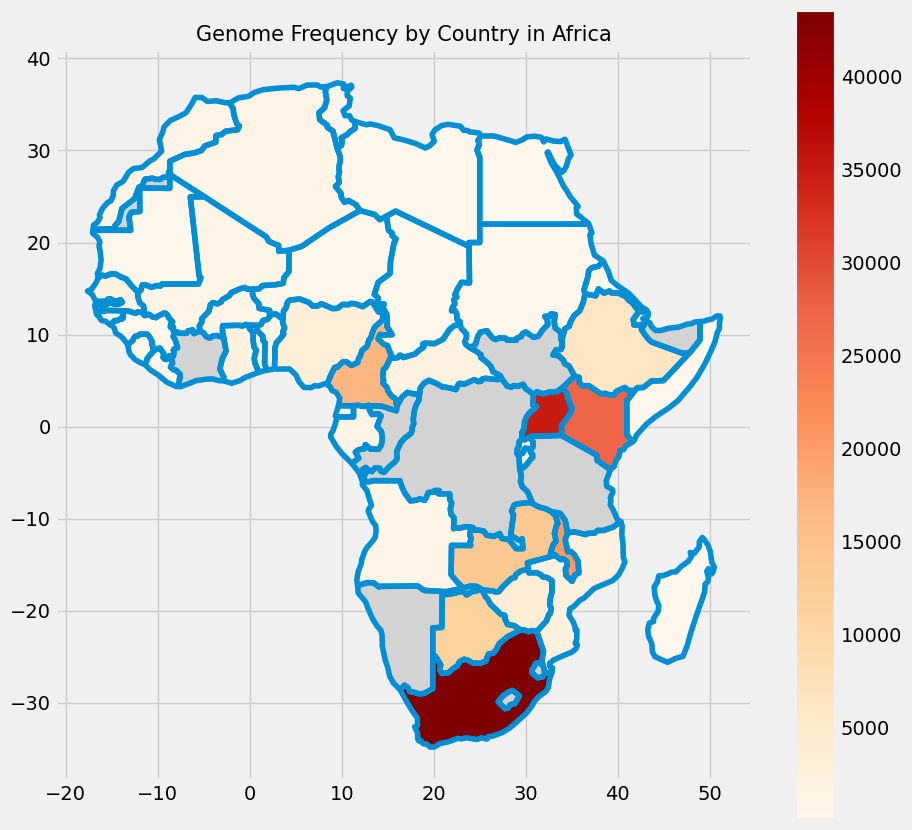

In [19]:
# Use value_counts() to get the frequency of genomes by country
genome_count = df_year_included['Country'].str.lower().value_counts().reset_index()
genome_count.columns = ['Country', 'Genome_Count']

# Step 2: Load the shapefile from the downloaded Natural Earth Data
shapefile_path = "./ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp"
world = gpd.read_file(shapefile_path)

# Filter for African countries
africa = world[world['CONTINENT'] == 'Africa']

# Normalize country names to lowercase
africa['name'] = africa['ADMIN'].str.lower()  # 'ADMIN' is the country name field in the shapefile

# Step 3: Merge your data with the Africa GeoDataFrame
africa_data = africa.merge(genome_count, how='left', left_on='name', right_on='Country')

# Step 4: Plot the map
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
africa_data.boundary.plot(ax=ax)
africa_data.plot(column='Genome_Count', ax=ax, legend=True, cmap='OrRd', missing_kwds={'color': 'lightgrey'})

# Set plot title and display
ax.set_title('Genome Frequency by Country in Africa', fontsize=15)
plt.show()

In [20]:
df_year_included['Sampling Year'].unique()

array([1997., 1999., 2000., 1992., 2003., 2002., 1993., 1989., 1990.,
       1991., 1994., 2009., 2010., 1995., 1959., 1996., 1988., 1987.,
       1998., 1985., 1983., 1984., 1986., 2001., 2004., 1982., 2005.,
       2006., 2007., 1960., 2008., 2011., 2012., 2013., 2014., 2015.,
       2016., 2021., 2020., 1976., 2017., 2018., 2019., 2022., 2023.,
       2024.])

In [21]:
df_year = df_year_included['Sampling Year'].value_counts()

In [22]:
df_year.columns = ['Years', 'Counts']
df_year.head()

Sampling Year
2008.0    17764
2007.0    17197
2005.0    15102
2009.0    12667
2002.0    12417
Name: count, dtype: int64

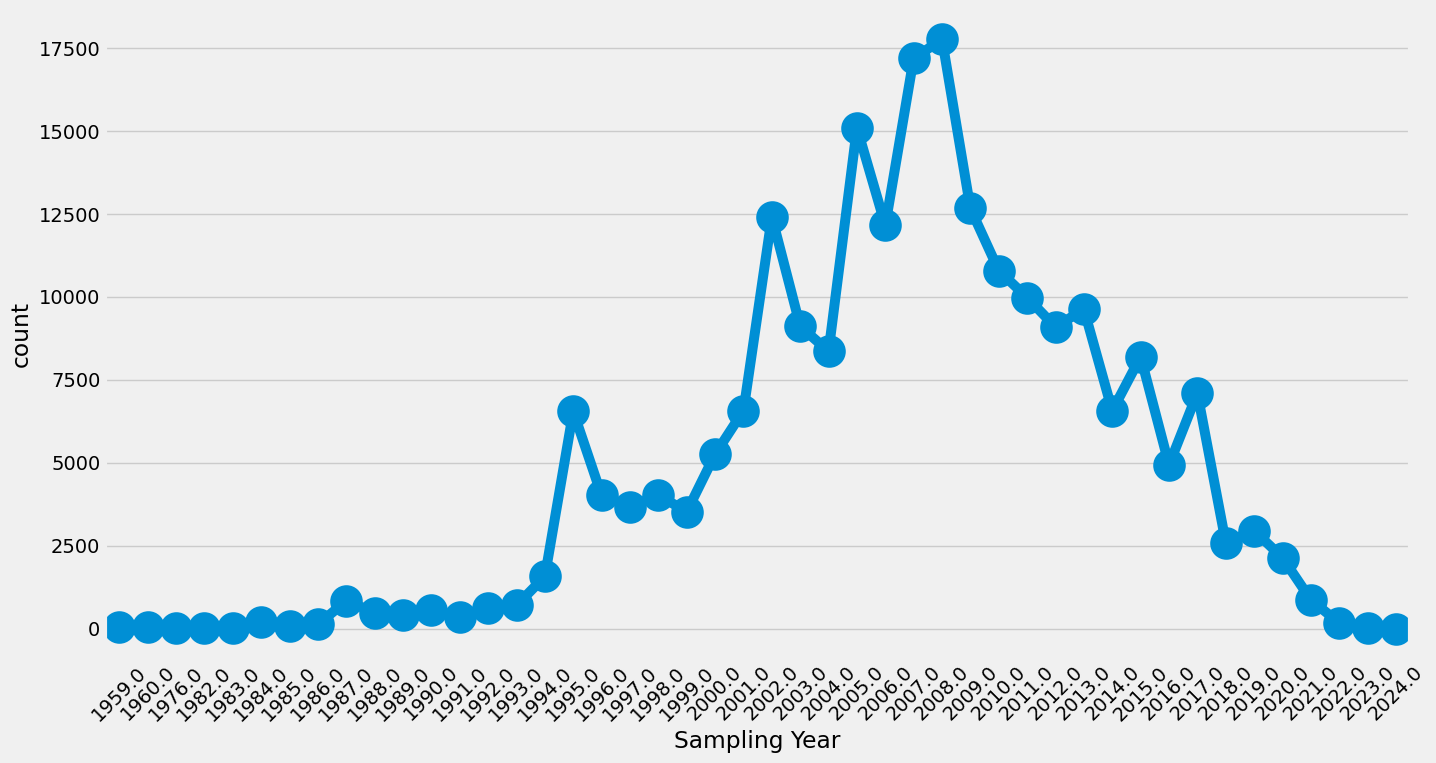

In [23]:
plt.figure(figsize=(15, 8))
sns.pointplot(data=df_year)
plt.xticks(rotation=45)
plt.show()

In [27]:
df_year_1990 = df_year_included[df_year_included['Sampling Year']>=1990]['Sampling Year'].value_counts()

In [28]:
df_year_1990.columns = ['Years', 'Counts']

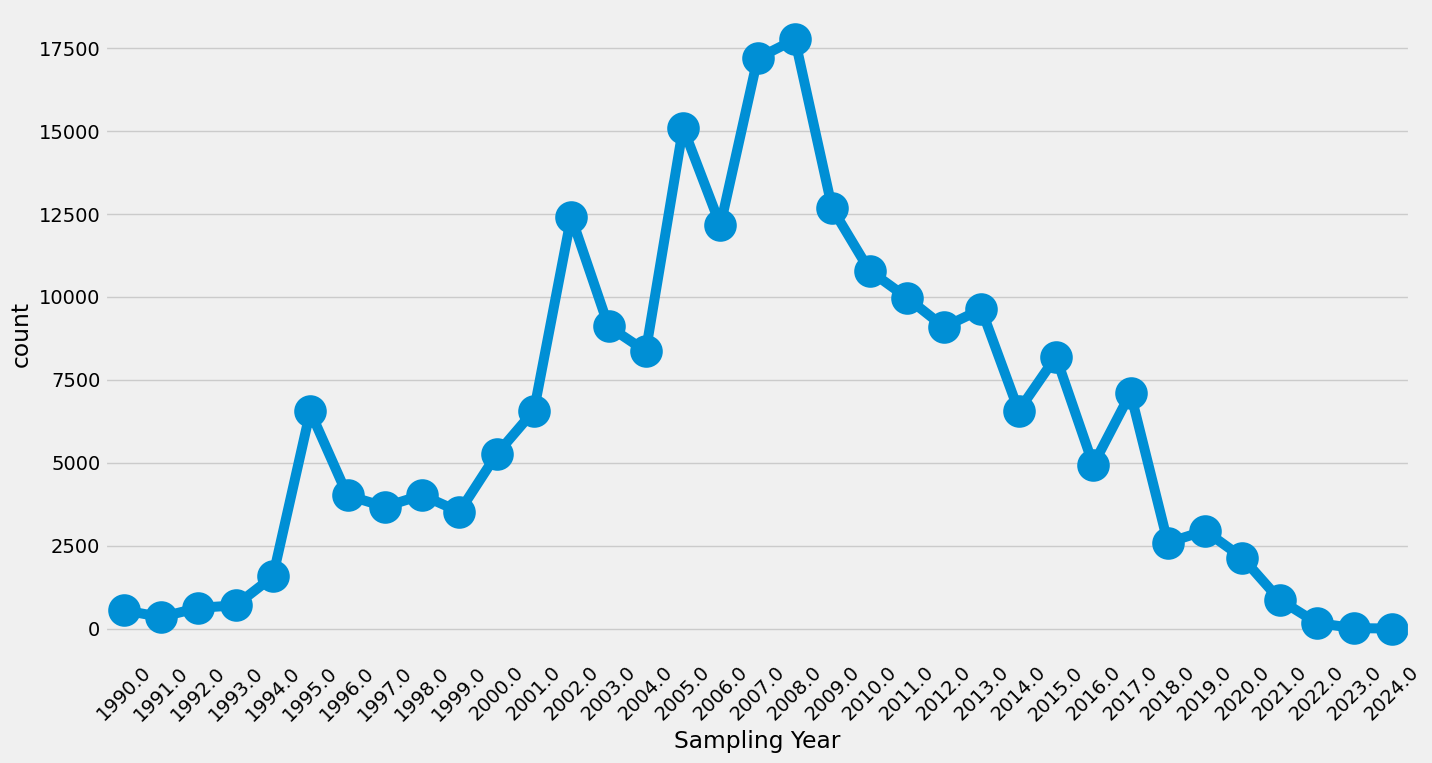

In [29]:
plt.figure(figsize=(15, 8))
sns.pointplot(data=df_year_1990)
plt.xticks(rotation=45)
plt.show()

In [53]:
df_analysis = df_year_included[df_year_included['Sampling Year']>=1990]['Accession']

In [57]:
df_analysis.to_csv('whole_africa_1990_till_date.csv', index=False)